In [1]:
from keras.layers import Embedding

C:\Users\SPundir\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
embedding_layer=Embedding(1000,64)

In [3]:
from keras.datasets import imdb

In [4]:
from keras import preprocessing

In [5]:
max_feat=20000
maxlen=30

In [6]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_feat)

In [7]:
x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)

In [8]:
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [9]:
x_test.shape

(25000, 30)

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model=Sequential()
model.add(Embedding(20000,8,input_length=maxlen))
model.add(Flatten())

In [11]:
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 8)             160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 240)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 241       
Total params: 160,241
Trainable params: 160,241
Non-trainable params: 0
_________________________________________________________________


In [14]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 4s 244us/step - loss: 0.6685 - acc: 0.6288 - val_loss: 0.6155 - val_acc: 0.7127
Epoch 2/10
17500/17500 [==============================] - 2s 98us/step - loss: 0.5264 - acc: 0.7729 - val_loss: 0.5065 - val_acc: 0.7507
Epoch 3/10
17500/17500 [==============================] - 2s 97us/step - loss: 0.4281 - acc: 0.8129 - val_loss: 0.4689 - val_acc: 0.7703
Epoch 4/10
17500/17500 [==============================] - 2s 106us/step - loss: 0.3755 - acc: 0.8368 - val_loss: 0.4568 - val_acc: 0.7827
Epoch 5/10
17500/17500 [==============================] - 2s 115us/step - loss: 0.3386 - acc: 0.8555 - val_loss: 0.4552 - val_acc: 0.7844
Epoch 6/10
17500/17500 [==============================] - 2s 105us/step - loss: 0.3092 - acc: 0.8704 - val_loss: 0.4574 - val_acc: 0.7865
Epoch 7/10
17500/17500 [==============================] - 2s 92us/step - loss: 0.2829 - acc: 0.8844 - val_loss: 0.4647 - val_

In [15]:
history.model.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x00000252F8E80860>>

In [16]:
import os
imdb_dir='E:\\aclImdb'
train_dir=os.path.join(imdb_dir,'train')

In [17]:
train_dir

'E:\\aclImdb\\train'

In [58]:
labels=[]
texts=[]
for label_type in ['neg','pos']:
    dir_name=os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        
        if fname[-4:]=='.txt':
            f=open(os.path.join(dir_name,fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type=='neg':
                labels.append(0)
            else:
                labels.append(1)
                    

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import os

In [20]:
maxlen=100
training_samples=200
validation_samples=4000
max_words=10000

In [21]:
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)

In [22]:
word_index=tokenizer.word_index
print('Number of unique words %s' % len(word_index))

Number of unique words 65156


In [23]:
data=pad_sequences(sequences,maxlen=maxlen)

In [24]:
indices=np.arange(data.shape[0])

In [41]:
np.random.shuffle(indices)
labels=np.asarray(labels)
indices=np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples: training_samples+validation_samples]
y_val=labels[training_samples: training_samples+validation_samples]

In [26]:
data=data[indices]
labels=labels[indices]

In [27]:
labels

array([0, 0, 0, ..., 0, 0, 1])

In [28]:
glove_dir="E:/kaggle_1/glove.6B"

In [29]:
embedding_index={}
f=open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf8')
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=coefs
f.close()
print('Found %s word vectors ' % len(embedding_index))

Found 400000 word vectors 


In [30]:
embedding_dim=100
embedding_matrix=np.zeros((max_words,embedding_dim))

In [31]:
for word, i in word_index.items():
    if i <max_words:
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

In [35]:
embedding_vector.shape

(100,)

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [37]:
model=Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=False

In [40]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [46]:
history=model.fit(x_train,y_train,
                 epochs=10,
                 batch_size=32,
                 validation_data=(x_val,y_val))


Train on 200 samples, validate on 4000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0134 - acc: 1.0000 - val_loss: 1.0142 - val_acc: 0.6930
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0102 - acc: 1.0000 - val_loss: 1.1773 - val_acc: 0.6933
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.9444 - val_acc: 0.6870
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.8150 - val_acc: 0.6637
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.0045 - val_acc: 0.6890
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.6276 - val_acc: 0.6947
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1536 - acc: 0.9300 - val_loss: 1.9867 - val_acc: 0.6947
Epoch 8/10
200/200 [=========

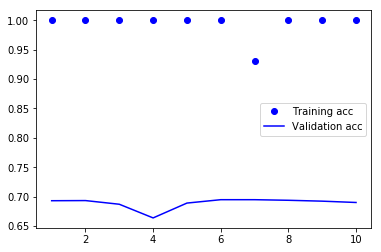

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_Acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_Acc,'b',label='Validation acc')
plt.legend()
plt.figure()
plt.show()

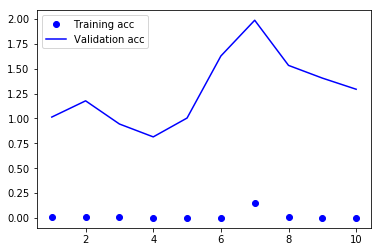

<Figure size 432x288 with 0 Axes>

In [56]:
plt.plot(epochs,loss,'bo',label='Training acc')
plt.plot(epochs,val_loss,'b',label='Validation acc')
plt.legend()
plt.figure()
plt.show()